In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
teams = pd.read_parquet('data/team_info.parquet')
data = pd.read_parquet('data/game_stats.parquet')

In [4]:
data.value_counts(data.date.dt.year).sort_index()

date
2012     65
2013    101
2014    126
2015    185
2016    193
2017    179
2018    171
2019    136
2021    134
2022    161
2023     42
dtype: int64

In [5]:
data.isnull().groupby(data.date.dt.year).sum().T

date,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023
game,0,0,0,0,0,0,0,0,0,0,0
date,0,0,0,0,0,0,0,0,0,0,0
tz,0,0,0,0,0,0,0,0,0,0,0
location,65,101,126,185,193,179,19,1,0,1,0
week,0,0,0,0,0,0,0,0,0,0,0
home,0,0,0,0,0,0,0,0,0,0,0
away,0,0,0,0,0,0,0,0,0,0,0
home_score,0,0,0,0,0,0,0,0,0,0,0
away_score,0,0,0,0,0,0,0,0,0,0,0
away_completions,0,0,0,0,0,0,0,0,0,0,0


# Game Stats
#### was each stat recorded for all games?
## !! some `0` values were not actually recorded and should be dropped or filled !!
#### effect might have to cascade, for ex: if D-Points weren't recorded, then D-Possesions and D-Scores weren't either
#### 
### if X-X-points is 0, better to drop or to fill?
#### going to drop column and directly related where 0 is definitely bogus
#### for home or away throws = 0, will drop both home and away. just in case
#### 

- Two rows with all non-score stats = 0, `1944` and `2492`
- redzone `<>_rz_<>` and huck `<>_hucks_<>` data wasn't completely recorded until 2021, (no games played 2020)
- ***AWAY Team's*** stats less likely to be recorded?

In [6]:
year_table = pd.DataFrame()

for col in data.columns:
    zero_portion = data[data[col]==0].shape[0]/data.shape[0]
    if zero_portion < 0.10:
        continue
    for year in range(data.date.dt.year.min(),data.date.dt.year.max()+1):
        part = data[data.date.dt.year == year]
        if part.shape[0] == 0:
            continue
        year_table.loc[col,year] = round(100*part[part[col]==0].shape[0]/part.shape[0])

In [7]:
year_table.where(year_table != 0, None, inplace = True)

In [8]:
year_table.style\
    .format(na_rep='',formatter="{:.0f}%")\
    .background_gradient(cmap='bone', axis=None, low=0.5)

,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023
away_hucks_completed,100%,100%,100%,100%,100%,100%,100%,98%,,1%,
away_hucks,100%,100%,100%,100%,100%,100%,100%,98%,,,
away_o_scores,100%,100%,1%,1%,1%,,,1%,,,
away_o_points,100%,100%,1%,1%,1%,,,1%,,,
away_o_possessions,100%,100%,1%,1%,1%,,,1%,,,
away_d_scores,100%,100%,6%,4%,2%,2%,2%,4%,4%,1%,5%
away_d_points,100%,100%,1%,1%,1%,,,1%,,,
away_d_possessions,100%,100%,1%,1%,1%,,,1%,,,
away_rz_scores,100%,100%,100%,100%,100%,100%,100%,98%,,,
away_rz_possessions,100%,100%,100%,100%,100%,100%,100%,98%,,,


In [10]:
data.columns[7:]

Index(['home_score', 'away_score', 'away_completions', 'away_throws',
       'away_hucks_completed', 'away_hucks', 'away_blocks', 'away_turnovers',
       'away_o_scores', 'away_o_points', 'away_o_possessions', 'away_d_scores',
       'away_d_points', 'away_d_possessions', 'away_rz_scores',
       'away_rz_possessions', 'home_completions', 'home_throws',
       'home_hucks_completed', 'home_hucks', 'home_blocks', 'home_turnovers',
       'home_o_scores', 'home_o_points', 'home_o_possessions', 'home_d_scores',
       'home_d_points', 'home_d_possessions', 'home_rz_scores',
       'home_rz_possessions'],
      dtype='object')

# ORIGINAL

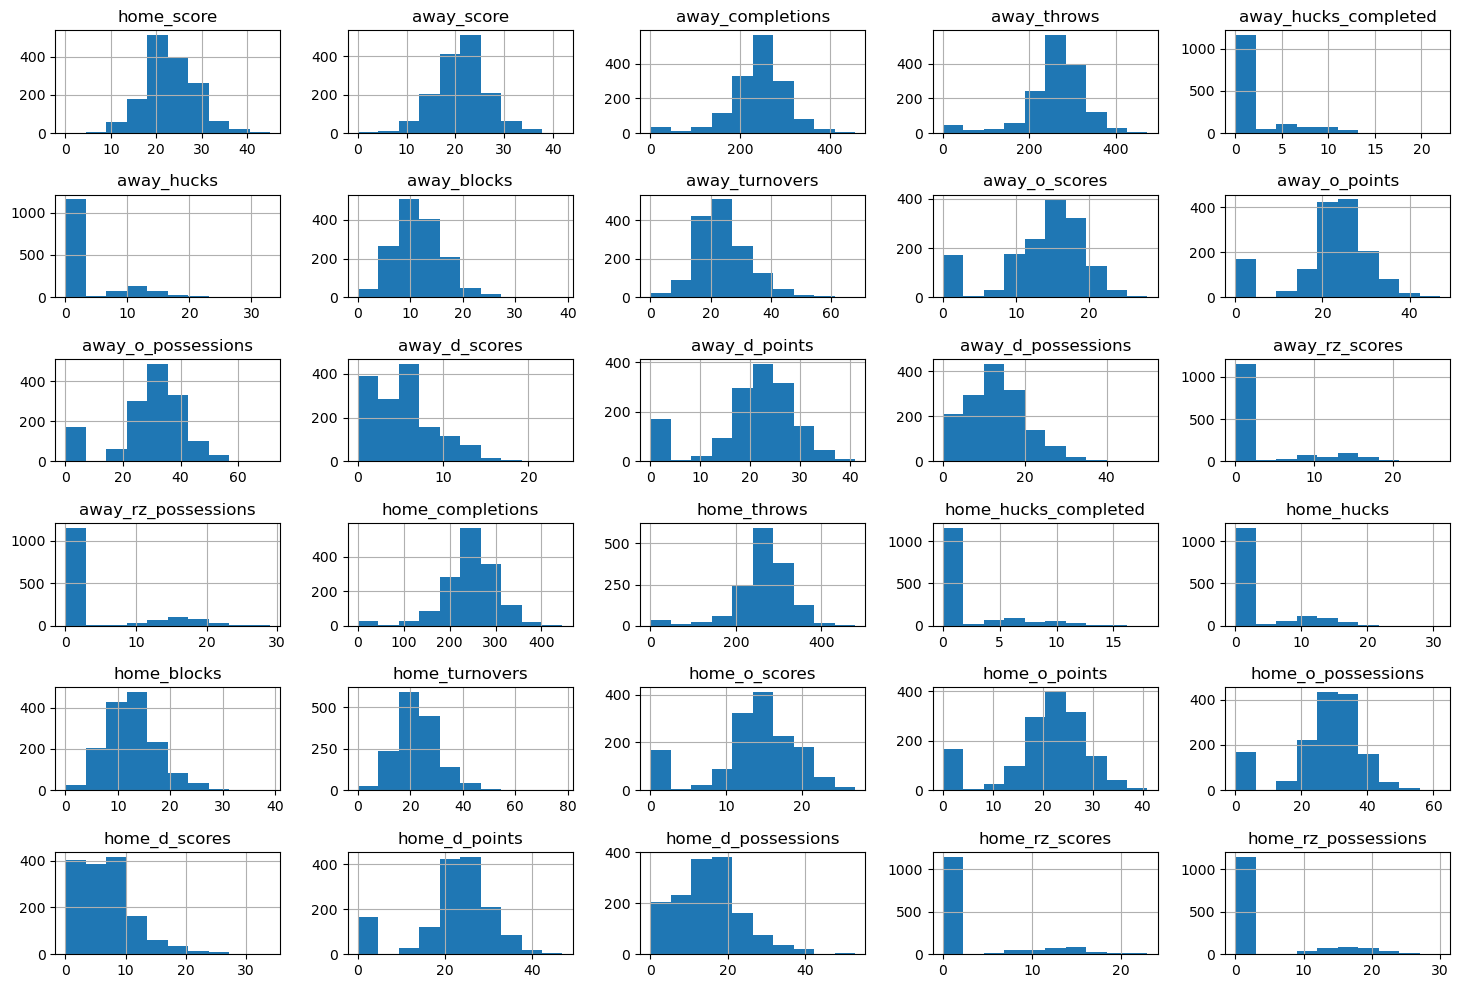

In [11]:
sub = data.loc[:,data.columns[7:]]

sub[sub>=0].hist(figsize=(18,12))
plt.subplots_adjust(hspace=0.6)

plt.savefig('data/initial_distributions.png', dpi=300)
plt.show()

Features to check recording start have high count of `0`

Possible to attempt 0 hucks, but not possible to have 0 points on either O or D. 
Redzone stats may be suspect, too.

Couple of games without any stats recorded will be removed

In [16]:
data[data[data.columns[9:]].sum(axis=1)==0]

,game,date,tz,location,week,home,away,home_score,away_score,away_completions,...,home_blocks,home_turnovers,home_o_scores,home_o_points,home_o_possessions,home_d_scores,home_d_points,home_d_possessions,home_rz_scores,home_rz_possessions
1944,2012-07-14-DET-CON,2012-07-14 19:00:00+00:00,CDT,NaN,14,Constitution,Mechanix,0,10,0,...,0,0,0,0,0,0,0,0,0,0
2492,2019-allstars,2019-06-08 18:00:00+00:00,CDT,NaN,10,All-Stars,All-Stars,28,27,0,...,0,0,0,0,0,0,0,0,0,0


## Cleaning Conclusions

*will use `-1` instead of `None` to preserve dtype*

1. Remove 2 games with no recorded stats, index = `1944`,`2492`
      - *delete rows*
2. Remove all huck and redzone data ~~prior to 2021~~, before `2019-08-10`, index = `2499`
      - *set values to `-1`*
3. Remove all "line" (O/D) stats if "points" == 0 
      - *set values to `-1`*
4. Remove all "throw" (home/away) stats if either throws or completions == 0
      - *set values to `-1`*


In [17]:
# no recorded stats except for score
nostats_ind = data[data[data.columns[9:]].sum(axis=1)==0].index
data.drop(index = nostats_ind, inplace=True)

In [24]:
# Remove Line Stats were not recorded, replace with -1 for now
# check: data[data.home_d_points == 0].loc[:,['home_d_points','home_d_scores','home_d_scores']].sum()
print('Line stats removed from', 
      data[(data.away_d_points == 0)|(data.away_o_points == 0)|(data.home_d_points == 0)|(data.home_o_points == 0)].shape[0], 
      'games')

data.loc[data[data.away_d_points == 0].index, ['away_d_points','away_d_scores','away_d_possessions']] = -1
data.loc[data[data.away_o_points == 0].index, ['away_o_points','away_o_scores','away_o_possessions']] = -1

data.loc[data[data.home_d_points == 0].index, ['home_d_points','home_d_scores','home_d_possessions']] = -1
data.loc[data[data.home_o_points == 0].index, ['home_o_points','home_o_scores','home_o_possessions']] = -1


Line stats removed from 171 games


In [25]:
year_table = pd.DataFrame()

for col in data.columns:
    zero_portion = data[data[col]==0].shape[0]/data.shape[0]
    if zero_portion < 0.10:
        continue
    for year in range(data.date.dt.year.min(),data.date.dt.year.max()+1):
        part = data[data.date.dt.year == year]
        if part.shape[0] == 0:
            continue
        year_table.loc[col,year] = round(100*part[part[col]==0].shape[0]/part.shape[0])
        
year_table.where(year_table != 0, None, inplace = True)

year_table.style\
    .format(na_rep='',formatter="{:.0f}%")\
    .background_gradient(cmap='bone', axis=None, low=0.5)

,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022,2023
away_hucks_completed,100%,100%,100%,100%,100%,100%,100%,98%,,1%,
away_hucks,100%,100%,100%,100%,100%,100%,100%,98%,,,
away_rz_scores,100%,100%,100%,100%,100%,100%,100%,98%,,,
away_rz_possessions,100%,100%,100%,100%,100%,100%,100%,98%,,,
home_hucks_completed,100%,100%,100%,100%,100%,100%,100%,98%,1%,,
home_hucks,100%,100%,100%,100%,100%,100%,100%,98%,,,
home_rz_scores,100%,100%,100%,100%,100%,100%,100%,98%,,,
home_rz_possessions,100%,100%,100%,100%,100%,100%,100%,98%,,,


In [31]:
data[data.date>= pd.to_datetime(data.loc[2499,'date'])].home_rz_possessions

2499    21
2500    11
2501    15
2702    12
2694    18
        ..
2973     9
3046    13
3006    20
3047    20
3048    23
Name: home_rz_possessions, Length: 340, dtype: int32

In [35]:
# Remove Huck and Redzone data prior to 2020
# Index 2499 was first game with recorded endzone and huck stats
late_stats = [
    'away_hucks_completed','away_hucks','home_hucks_completed','home_hucks',
    'away_rz_scores','away_rz_possessions','home_rz_scores','home_rz_possessions'
            ]

In [36]:
data.loc[data[data.date< pd.to_datetime(data.loc[2499,'date'])].index, late_stats] = -1

In [37]:
# Remove all throwing data, if incomplete
drop_throws = ['home_throws','home_completions','away_throws', 'away_completions']

# set to -1
data.loc[\
         data[(data.home_throws==0) | (data.away_throws==0) | (data.home_completions==0) | (data.away_completions==0)\
             ].index, drop_throws] = -1

# After Initial Cleaning

In [38]:
data.to_parquet('data/game_stats_clean_1.parquet', engine='pyarrow', compression='gzip')

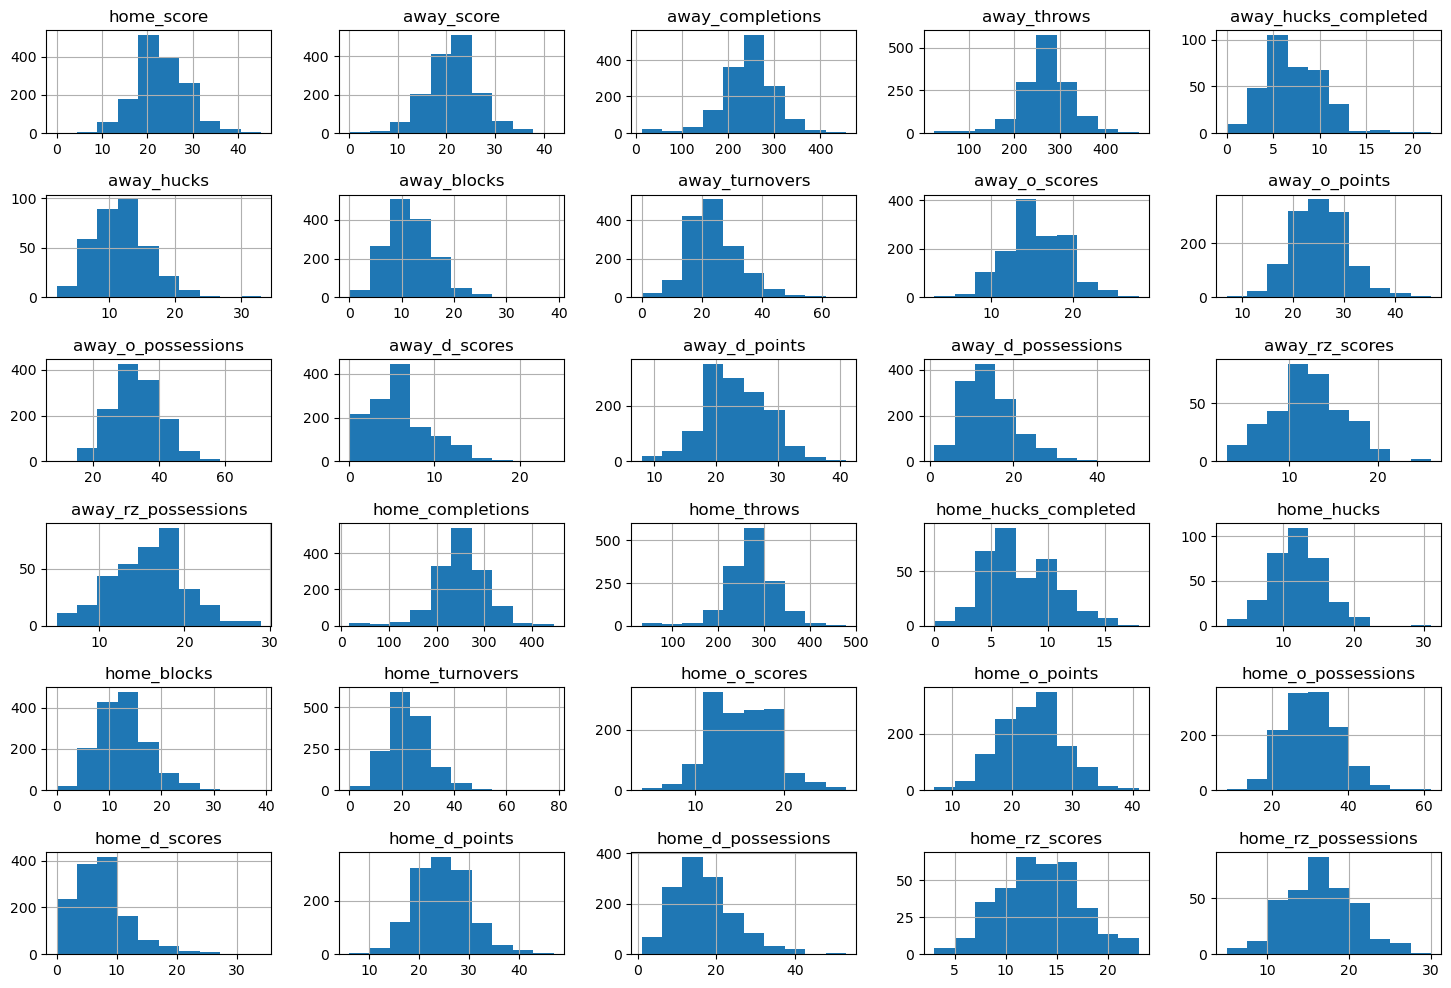

In [43]:
sub = data.loc[:,data.columns[7:]]

sub[sub>=0].hist(figsize=(18,12))
plt.subplots_adjust(hspace=0.6)

plt.savefig('data/clean_1_distributions.png', dpi=300)
plt.show()

# Notes

---
### Bogus 0 values, pass 1

In [19]:
for col in data.columns:
    zero_portion = data[data[col]==0].shape[0]/data.shape[0]
    if zero_portion >= 0.10:
        print(col, round(100*zero_portion))

away_hucks_completed 77
away_hucks 77
away_o_scores 12
away_o_points 12
away_o_possessions 12
away_d_scores 14
away_d_points 12
away_d_possessions 12
away_rz_scores 77
away_rz_possessions 77
home_hucks_completed 77
home_hucks 77
home_o_scores 11
home_o_points 11
home_o_possessions 11
home_d_scores 12
home_d_points 11
home_d_possessions 11
home_rz_scores 77
home_rz_possessions 77


In [78]:
away_cols = data.columns[6:20]

In [79]:
home_cols = data.columns[20:]

In [99]:
data[(data.away_d_points == 0) & (data.date.dt.year > 2014)].loc[:,away_cols]

,away_completions,away_throws,away_hucks_completed,away_hucks,away_blocks,away_turnovers,away_o_scores,away_o_points,away_o_possessions,away_d_scores,away_d_points,away_d_possessions,away_rz_scores,away_rz_possessions
1752,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1709,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1516,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,0,0,0,0,0,0,0,0,0,0


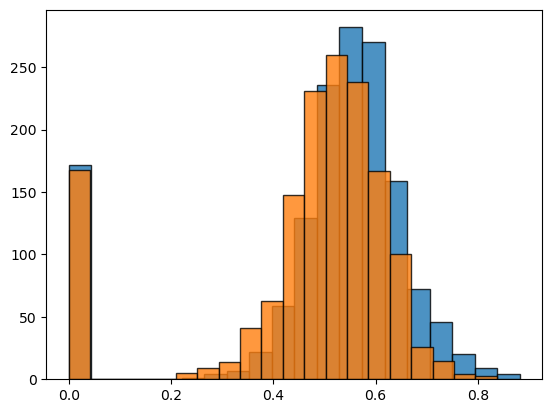

In [63]:
plt.hist(data.away_o_points / (data.home_score + data.away_score), bins=20, ec='k', alpha=0.8)
plt.hist(data.home_o_points / (data.home_score + data.away_score), bins=20, ec='k', alpha=0.8)
plt.show()

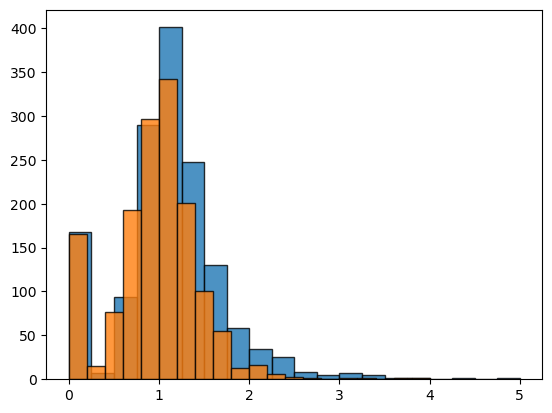

In [83]:
plt.hist(data.away_o_points / (data.away_score), bins=20, ec='k', alpha=0.8)
plt.hist(data.home_o_points / (data.home_score), bins=20, ec='k', alpha=0.8)
plt.show()

---
### 
## Throws?

In [314]:
throw_cols = ['date','home','home_throws','home_completions','away','away_throws', 'away_completions']

In [339]:
(data[(data.home_throws==0) | (data.away_throws==0)].date.dt.year<2015).sum()

52

In [334]:
data[(data.home_throws==0) | (data.away_throws==0)][throw_cols]

,date,home,home_throws,home_completions,away,away_throws,away_completions
1891,2012-04-14 19:00:00+00:00,Revolution,192,185,Mechanix,0,160
1894,2012-04-14 19:00:00+00:00,Rampage,0,157,Constitution,352,162
1895,2012-04-21 19:00:00+00:00,Cranes,127,113,Rampage,0,184
1898,2012-04-22 19:00:00+00:00,Mechanix,156,203,Rampage,0,176
1901,2012-04-29 19:00:00+00:00,Mechanix,0,204,Dragons,174,173
1903,2012-05-05 19:00:00+00:00,AlleyCats,159,142,Mechanix,0,183
1905,2012-05-06 19:00:00+00:00,Cranes,122,110,Mechanix,0,185
1909,2012-05-12 19:00:00+00:00,Spinners,189,166,Rampage,0,155
1907,2012-05-12 19:00:00+00:00,Constitution,0,180,Dragons,147,142
1908,2012-05-12 19:00:00+00:00,Mechanix,0,187,Revolution,205,193


C:\Users\Nish\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


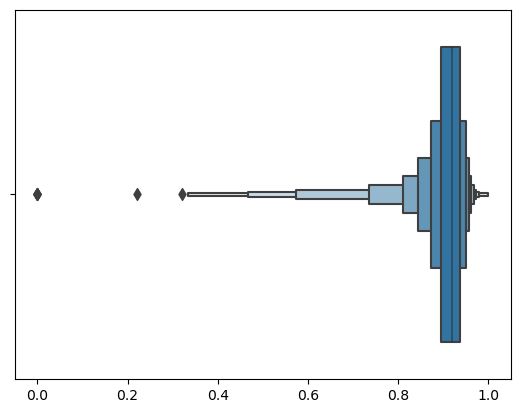

In [330]:
sns.boxenplot(x = pd.concat([data.away_completions/data.away_throws,data.home_completions/data.home_throws]))
plt.show()

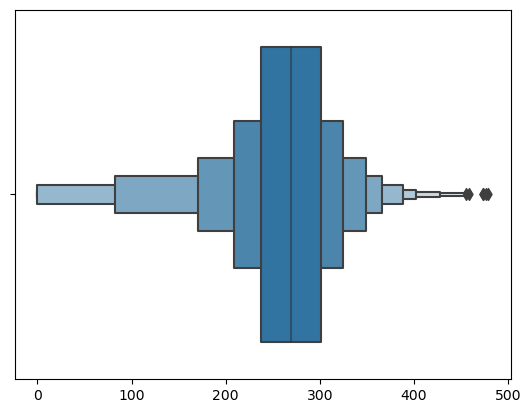

In [331]:
sns.boxenplot(x = pd.concat([data.away_throws,data.home_throws]))
x = plt.xlim()
plt.show()

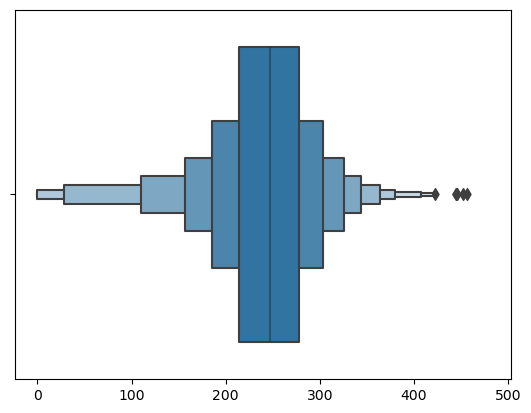

In [332]:
sns.boxenplot(x = pd.concat([data.away_completions,data.home_completions]))
plt.xlim(x)
plt.show()

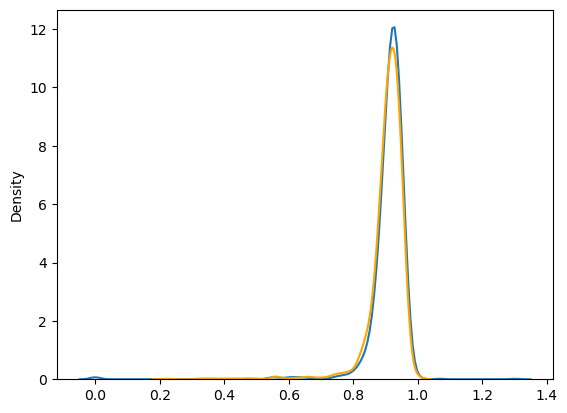

In [333]:
# kdeplot, histplot, ecdfplot, swarmplot
sns.kdeplot(x=data.home_completions/data.home_throws)
sns.kdeplot(x=data.away_completions/data.away_throws, color='orange')
plt.show()

- no clear trends with missing data, *58 games with either 0 home or away throws*
- more recent games *(2 per year from 2014-2016)* seem to be reliable and just missing one team
- many games prior to 2014 *(52)*, some data seems more bogus
---
- will drop all and then assess for bad data
- check for 0 completions! --> one more game, will drop